# Case Ifood
*Desenvolvido por Mário de Deus*

# Installs

In [ ]:
#No Google Colab será necessário executar as instalações abaixo a cada nova sessão.
#No Jupyter Notebook, Jupyter Lab ou VSCode (localhost) basta instalar uma única vez.
!pip install numba
!pip install pycaret numpy pandas seaborn

# Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from pycaret.classification import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_colwidth', 1000)

import warnings
warnings.filterwarnings('ignore')

# Descrição / Objetivo do problema

* O objetivo

O objetivo da equipe é construir um modelo preditivo que produzirá o maior lucro para a próxima campanha de marketing direto, programada para o próximo mês. A nova campanha, sexta, visa a venda de um novo gadget para clientes cadastrados no Banco de Dados da empresa. Para construir o modelo, foi realizada uma campanha piloto envolvendo 2.240 clientes. Os clientes foram selecionados aleatoriamente e contatados por telefone para a aquisição do gadget. Durante os meses seguintes, os clientes que compraram a oferta foram devidamente etiquetados. O custo total da campanha da amostra foi de 6,720MU e a receita gerada pelos clientes que aceitaram a oferta foi de 3,674MU. Globalmente, a campanha teve um lucro de -3,046MU. A taxa de sucesso da campanha foi de 15%. O objetivo da equipe é desenvolver um modelo que preveja o comportamento do cliente e aplicá-lo ao restante da base de clientes. Felizmente, o modelo permitirá que a empresa escolha a dedo os clientes com maior probabilidade de comprar a oferta, deixando de fora os não respondentes, tornando a próxima campanha altamente lucrativa. Além disso, além de maximizar o lucro da campanha, o CMO está interessado em estudar as características dos clientes que desejam comprar o gadget.
Os dados
O conjunto de dados contém características sociodemográficas e firográficas de cerca de 2.240 clientes contatados. Além disso, contém um sinalizador para aqueles clientes que responderam à campanha, comprando o produto.


# Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
#Google COlab
#df = pd.read_csv('/content/drive/MyDrive/Front End e Mobile Development/2025/20250314 - Aula05/data.csv',encoding='utf-8')

#Jupyter
df = pd.read_csv('data.csv',encoding='utf-8')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Data Cleaning

Drop da feature ID por ser um identificador

In [6]:
df.drop('ID',axis = 1, inplace = True, errors = 'ignore')
df.shape

(2240, 28)

## Features com valores unicos
Verificando a existência de features com valores únicos (devem ser dropadas por não contribuirem para a explicar a variação da feature target)

In [7]:
df.nunique().sort_values()

Z_Revenue                 1
Z_CostContact             1
Response                  2
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp2              2
AcceptedCmp1              2
Complain                  2
Teenhome                  3
Kidhome                   3
Education                 5
Marital_Status            8
NumCatalogPurchases      14
NumStorePurchases        14
NumDealsPurchases        15
NumWebPurchases          15
NumWebVisitsMonth        16
Year_Birth               59
Recency                 100
MntFruits               158
MntSweetProducts        177
MntFishProducts         182
MntGoldProds            213
MntMeatProducts         558
Dt_Customer             663
MntWines                776
Income                 1974
dtype: int64

In [8]:
df.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace = True, errors = 'ignore')

## NaN analysis

In [9]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

Somente a feature Income possui valores nulos.
Analisando as linhas com valores nulos em relação aos valores da feature target

In [10]:
#Distribuição da feature Response entre as amostras com Income = NaN
df[df.Income.isna()].Response.value_counts()

Response
0    23
1     1
Name: count, dtype: int64

In [11]:
# Proporção de 0 e 1 da feature Response no df completo
df.Response.value_counts(normalize = True)

Response
0    0.850893
1    0.149107
Name: proportion, dtype: float64

In [12]:
print('% amostras com NaN: ',np.round((df.Income.isna().sum()/len(df))*100,2))
print('% amostras com NaN e Response = 1: ',
      np.round((( len(df[(df.Income.isna()) & (df.Response == 1)]) / len(df))*100),2))

% amostras com NaN:  1.07
% amostras com NaN e Response = 1:  0.04


Dado que as 24 linhas com valores Nan representam 1% do dataset total, e que entre as 24 linhas com Income == Nan somente uma apresentou Response == 1 (0.04%), as 24 linhas serão dropadas

In [13]:
print('Shape antes do dropna: ',df.shape[0])
df.dropna(axis=0,inplace = True)
print('Shape após o dropna: ',df.shape[0])

Shape antes do dropna:  2240
Shape após o dropna:  2216


## Ajuste do dtypes

In [14]:
df = df.convert_dtypes()
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)
df.dtypes

Year_Birth                      Int64
Education              string[python]
Marital_Status         string[python]
Income                          Int64
Kidhome                         Int64
Teenhome                        Int64
Dt_Customer            datetime64[ns]
Recency                         Int64
MntWines                        Int64
MntFruits                       Int64
MntMeatProducts                 Int64
MntFishProducts                 Int64
MntSweetProducts                Int64
MntGoldProds                    Int64
NumDealsPurchases               Int64
NumWebPurchases                 Int64
NumCatalogPurchases             Int64
NumStorePurchases               Int64
NumWebVisitsMonth               Int64
AcceptedCmp3                    Int64
AcceptedCmp4                    Int64
AcceptedCmp5                    Int64
AcceptedCmp1                    Int64
AcceptedCmp2                    Int64
Complain                        Int64
Response                        Int64
dtype: objec

# Feature Engineering

## Idade dos clientes

In [15]:
from datetime import datetime
ano_atual = datetime.now().year
df['Age'] = ano_atual - df.Year_Birth
df.drop('Year_Birth',axis = 1, inplace = True, errors = 'ignore')
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,68
1,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,71
2,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,60
3,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,41
4,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,44


## Tempo como cliente

In [16]:
dt = datetime.now().date()
df['Time_Customer'] = dt - pd.to_datetime(df['Dt_Customer']).dt.date
df['Time_Customer'] = df['Time_Customer'] / np.timedelta64(365, 'D')
print(df[['Dt_Customer','Time_Customer']].head())
df.drop('Dt_Customer',axis = 1, inplace = True)

  Dt_Customer  Time_Customer
0  2012-09-04      12.605479
1  2014-03-08      11.098630
2  2013-08-21      11.643836
3  2014-02-10      11.169863
4  2014-01-19      11.230137


### Removendo valores incoerentes com a variável Marital_Status

In [17]:
index_to_drop = df[(df['Marital_Status'] =='YOLO') | (df['Marital_Status'] =='Absurd') | (df['Marital_Status'] =='absurd') | (df['Marital_Status'] == 'Alone')].index
df.drop(index_to_drop,inplace = True)
df = df.reset_index(drop = True)
df.Marital_Status.value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Name: count, dtype: Int64

In [18]:
df.rename(columns={'Response':'z_Response'},inplace = True)
cols = df.columns.sort_values()
df = df[cols]
df.rename(columns={'z_Response':'Response'},inplace = True)

df.columns

Index(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Age', 'Complain', 'Education', 'Income', 'Kidhome',
       'Marital_Status', 'MntFishProducts', 'MntFruits', 'MntGoldProds',
       'MntMeatProducts', 'MntSweetProducts', 'MntWines',
       'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases',
       'NumWebPurchases', 'NumWebVisitsMonth', 'Recency', 'Teenhome',
       'Time_Customer', 'Response'],
      dtype='object')

# Preparação do dataset para Modelagem


## Train Test Validation Split

In [22]:
# sample 5% of data to be used as unseen data
df_train_test = df.sample(frac=0.95, random_state=123)
df_valid = df.drop(df_train_test.index)
df_train_test.reset_index(inplace=True, drop=True)
df_valid.reset_index(inplace=True, drop=True)
# print the revised shape
print('Data for Modeling: ' + str(df_train_test.shape))
print('Unseen Data For Predictions: ' + str(df_valid.shape))

Data for Modeling: (2099, 26)
Unseen Data For Predictions: (110, 26)


In [ ]:
#Linha acrescentada por aluno para salvar data cleansing e train test split proposto
df_train_test.to_csv('Model Training\cleansed_df_train.csv',index = False, encoding = 'utf-8')
df_valid.to_csv('Model Training\cleansed_df_test.csv',index = False, encoding = 'utf-8')

# Auto ML - PYCARET

**Para o problema de negócio em questão, a métrica Precision é a mais relevante.**

## Setup

In [31]:
s = setup(data = df_train_test,
          target = 'Response',
          fix_imbalance = True,
          remove_outliers = True,
          categorical_features = ['Education', 'Marital_Status'],
          session_id = 123)

,Description,Value
0,Session id,123
1,Target,Response
2,Target type,Binary
3,Original data shape,"(2099, 26)"
4,Transformed data shape,"(3072, 34)"
5,Transformed train set shape,"(2442, 34)"
6,Transformed test set shape,"(630, 34)"
7,Numeric features,23
8,Categorical features,2
9,Preprocess,True


In [32]:
# check available models
#has to be called necessary only after having defined a setup.
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessClassifier,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## Comparativo entre Modelos

In [33]:
best_model = compare_models(sort = 'auc', errors = 'raise')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8121,0.9005,0.8099,0.4380,0.5669,0.4613,0.4976,0.0180
lda,Linear Discriminant Analysis,0.8128,0.9004,0.8099,0.4389,0.5677,0.4624,0.4985,0.0190
gbc,Gradient Boosting Classifier,0.8741,0.8916,0.4478,0.6165,0.5155,0.4455,0.4548,0.0980
lightgbm,Light Gradient Boosting Machine,0.8727,0.8863,0.3802,0.6329,0.4700,0.4034,0.4229,0.1250
rf,Random Forest Classifier,0.8836,0.8785,0.3802,0.7094,0.4914,0.4333,0.4618,0.0480
ada,Ada Boost Classifier,0.8632,0.8658,0.5524,0.5535,0.5485,0.4685,0.4711,0.0400
et,Extra Trees Classifier,0.8870,0.8536,0.3798,0.7532,0.5003,0.4448,0.4803,0.0390
qda,Quadratic Discriminant Analysis,0.7641,0.8299,0.6478,0.4101,0.4827,0.3647,0.3804,0.0210
lr,Logistic Regression,0.7475,0.8114,0.7235,0.3411,0.4625,0.3247,0.3649,0.4210
nb,Naive Bayes,0.6937,0.7793,0.6785,0.2853,0.4006,0.2396,0.2804,0.0200


In [ ]:
#Linha acrescentada por aluno para salvar tabela com os resultados dos modelos
resultados = pull()
resultados.to_csv('Model Training\pycaret_first_results.csv',index = False, encoding = 'utf-8')


In [26]:
print(best_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)


In [ ]:
#Linha acrescentada por aluno para salvar o modelo e suas informações
save_model(best_model, 'Model Training\pycaret_first_results_best_model')
with open("Model Training\pycaret_first_results_best_model_info.txt", "w") as f:
    f.write(str(best_model))


Transformation Pipeline and Model Successfully Saved


## Análise do Modelo

In [ ]:
#evaluate best model
evaluate_model(???)

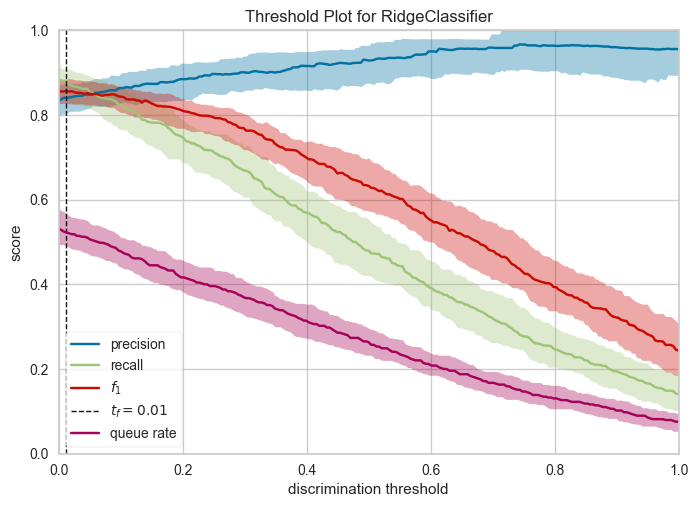

In [41]:
#plot model - treshold
plot_model(best_model, plot = 'threshold')

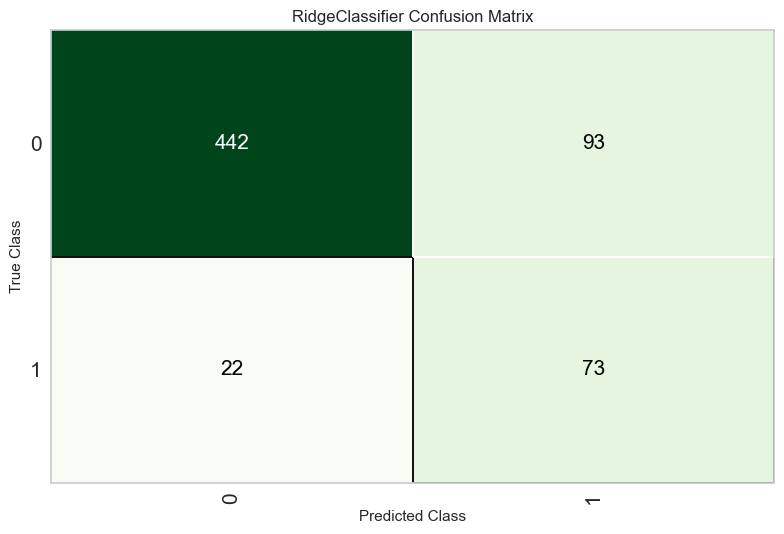

In [42]:
#plot model - confusion matrix
plot_model(best_model, plot = 'confusion_matrix')

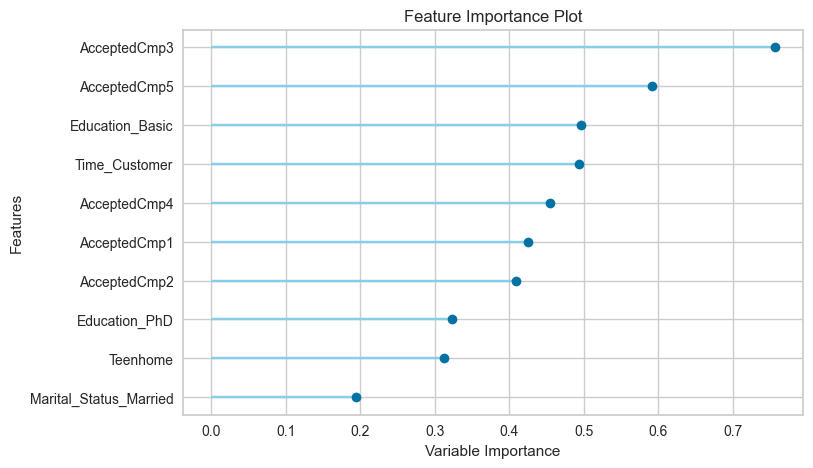

In [45]:
#plot model - feature
plot_model(best_model, plot = 'feature')

In [48]:
#predict model - raw score
predict_model(best_model, data = df_valid, raw_score = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7545,0.7679,0.7857,0.3143,0.4490,0.3265,0.3833


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Complain,Education,Income,Kidhome,...,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Teenhome,Time_Customer,Response,prediction_label
0,0,0,0,0,0,41,0,Graduation,26646,1,...,0,2,4,2,6,26,0,11.169863,0,0
1,0,0,0,0,0,79,0,Graduation,37760,0,...,1,2,6,4,7,20,0,12.616438,0,1
2,0,0,0,0,0,40,0,Master,20559,1,...,0,2,3,2,8,88,0,12.087671,0,0
3,0,0,0,0,0,68,0,Graduation,65486,0,...,2,1,10,4,2,29,1,10.920547,0,0
4,0,0,0,0,0,61,0,Master,79143,0,...,9,1,13,6,3,2,0,12.671233,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0,0,0,0,0,47,0,Basic,26487,1,...,1,3,3,2,5,23,0,11.898630,0,0
106,0,0,0,0,0,42,0,Master,89616,0,...,5,1,12,7,2,36,0,12.128767,1,1
107,0,0,0,0,0,78,0,Graduation,27469,0,...,0,1,3,0,6,2,0,12.695890,0,1
108,0,0,0,0,0,30,0,2n Cycle,80617,0,...,6,1,8,4,2,42,0,12.501369,0,1


* Outros tipos de plot:
https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.plot_model

## Criando um Modelo

In [ ]:
#create model gbc
mdl_gbc =

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8639,0.8680,0.5000,0.5500,0.5238,0.4447,0.4453
1,0.8776,0.9149,0.5455,0.6000,0.5714,0.5002,0.5010
2,0.8776,0.8982,0.5000,0.6111,0.5500,0.4800,0.4832
3,0.8844,0.9022,0.5000,0.6471,0.5641,0.4987,0.5042
4,0.8912,0.9222,0.4091,0.7500,0.5294,0.4738,0.5017
5,0.8776,0.8931,0.4545,0.6250,0.5263,0.4580,0.4657
6,0.8503,0.8775,0.3636,0.5000,0.4211,0.3376,0.3432
7,0.8571,0.8618,0.3636,0.5333,0.4324,0.3540,0.3626
8,0.8912,0.8878,0.4783,0.7333,0.5789,0.5196,0.5353


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#create model lgbm
mdl_lgbm =

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8716,0.3182,0.5385,0.4000,0.3250,0.3395
1,0.9048,0.9138,0.5455,0.7500,0.6316,0.5785,0.5881
2,0.8639,0.8640,0.3182,0.5833,0.4118,0.3423,0.3624
3,0.8707,0.8978,0.5455,0.5714,0.5581,0.4825,0.4827
4,0.8571,0.9044,0.3182,0.5385,0.4000,0.3250,0.3395
5,0.8912,0.8589,0.3636,0.8000,0.5000,0.4484,0.4925
6,0.8776,0.8836,0.3636,0.6667,0.4706,0.4081,0.4321
7,0.8571,0.8545,0.3182,0.5385,0.4000,0.3250,0.3395
8,0.8776,0.9151,0.3478,0.7273,0.4706,0.4110,0.4468


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Tuning dos Hiperparâmetros

### GBC

In [ ]:
tuned_gbc = tune_model(???)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:45:29
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
#predict gbc
#mdl_gbc sem tuning apresentou AUC medio maior que o tunado e desvio padrao (STD) menor,
#indicando que os hiperparametros originais geram um modelo mais consistente / robusto.
predict_model(mdl_gbc, raw_score = True)

In [ ]:
print(mdl_gbc)

In [ ]:
print(tuned_gbc)

### LGBM

In [ ]:
tuned_lgbm = tune_model(???)

In [ ]:
#predict lgbm
predict_model(???, raw_score = True)

# Melhor Modelo: LGBM com tuning
* Foram comparados os modelos LGBM e GBC, antes e depois do tuning dos hiperparametros, e o LGBM apresentou melhores AUCs.

## AUC Plot

In [ ]:
#auc
plot_model(tuned_lgbm, plot = 'auc')

## Feature Importance

In [ ]:
#feature
plot_model(tuned_lgbm, plot = 'feature')

## Matriz de Confusão

In [ ]:
#confusion matrix
plot_model(tuned_lgbm, plot = 'confusion_matrix')

## Shap

In [ ]:
#Global
interpret_model(tuned_lgbm)#, use_train_data = True)

In [ ]:
#Per index
interpret_model(tuned_lgbm, plot = 'reason', observation = 10)

# Referências:
* https://towardsdatascience.com/introduction-to-binary-classification-with-pycaret-a37b3e89ad8d
* https://pycaret.gitbook.io/docs/get-started/quickstart#classification
* https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.plot_model